### Team 2
#### Charlie Lew, Breonna Moore, Casey Ghilardi

## Read database in

In [1]:
import pandas as pd
import sqlite3
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


#has data from 9/7/19-9/21-19
conn = sqlite3.connect('mta_scrape1.db')
query = "SELECT *, DATE(DATETIME) AS DATE from entries where DESC IN ('REGULAR','RECOVR AUD')"

df = pd.read_sql_query(query,conn)

df.head()



,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 00:00:00,00:00:00,REGULAR,7198818,2438323,2019-09-14
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14


### Calculate additional columns

In [2]:
#create turnstile index column
df['TURNSTILE_INDEX'] = df['CA'] + '-' +  df['UNIT'] + '-' + df['SCP'] + '-' + df['STATION']

df.head()

,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE,TURNSTILE_INDEX
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 00:00:00,00:00:00,REGULAR,7198818,2438323,2019-09-14,A002-R051-02-00-00-59 ST
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14,A002-R051-02-00-00-59 ST
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14,A002-R051-02-00-00-59 ST
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14,A002-R051-02-00-00-59 ST
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14,A002-R051-02-00-00-59 ST


In [3]:
# Calculate ENTRIES_DIFF and EXITS_DIFF for each turnstile by derivative. 

turnstile_groupby = df.groupby(['CA','UNIT','SCP','STATION'])
for diff_field in ('ENTRIES','EXITS'):
    df[diff_field + '_DIFF'] = turnstile_groupby[diff_field].transform(pd.Series.diff)
df['FLOW_SUM'] = df['ENTRIES_DIFF'] + df['EXITS_DIFF']
    
df.head(15)



,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE,TURNSTILE_INDEX,ENTRIES_DIFF,EXITS_DIFF,FLOW_SUM
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 00:00:00,00:00:00,REGULAR,7198818,2438323,2019-09-14,A002-R051-02-00-00-59 ST,NaN,NaN,NaN
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14,A002-R051-02-00-00-59 ST,16.0,2.0,18.0
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14,A002-R051-02-00-00-59 ST,13.0,29.0,42.0
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14,A002-R051-02-00-00-59 ST,82.0,74.0,156.0
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14,A002-R051-02-00-00-59 ST,196.0,55.0,251.0
5,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 20:00:00,20:00:00,REGULAR,7199405,2438527,2019-09-14,A002-R051-02-00-00-59 ST,280.0,44.0,324.0
6,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-15 00:00:00,00:00:00,REGULAR,7199547,2438545,2019-09-15,A002-R051-02-00-00-59 ST,142.0,18.0,160.0
7,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-15 04:00:00,04:00:00,REGULAR,7199567,2438547,2019-09-15,A002-R051-02-00-00-59 ST,20.0,2.0,22.0
8,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-15 08:00:00,08:00:00,REGULAR,7199579,2438564,2019-09-15,A002-R051-02-00-00-59 ST,12.0,17.0,29.0
9,10,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-15 12:00:00,12:00:00,REGULAR,7199648,2438630,2019-09-15,A002-R051-02-00-00-59 ST,69.0,66.0,135.0


In [4]:
#groupby date to get mean flow(entries + exit)
df2 = df.groupby(['CA','UNIT','SCP','STATION','DATE']).mean()
df2 = df2.drop(columns='id')
df2.reset_index().head()

,CA,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,ENTRIES_DIFF,EXITS_DIFF,FLOW_SUM
0,A002,R051,02-00-00,59 ST,2019-08-31,7.183431e+06,2.433232e+06,-2462.666667,-825.000000,-3287.666667
1,A002,R051,02-00-00,59 ST,2019-09-01,7.184186e+06,2.433436e+06,119.500000,29.500000,149.000000
2,A002,R051,02-00-00,59 ST,2019-09-02,7.184806e+06,2.433608e+06,95.500000,29.500000,125.000000
3,A002,R051,02-00-00,59 ST,2019-09-03,7.185546e+06,2.433862e+06,203.833333,60.166667,264.000000
4,A002,R051,02-00-00,59 ST,2019-09-04,7.186833e+06,2.434298e+06,219.500000,83.333333,302.833333


In [5]:
#create a new column converting date to day of week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DAY'] = pd.Series(days[date(int(d_num[0:4]), int(d_num[5:7]), int(d_num[8:])).weekday()] for d_num in df['DATE'])
df.head()

,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE,TURNSTILE_INDEX,ENTRIES_DIFF,EXITS_DIFF,FLOW_SUM,DAY
0,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 00:00:00,00:00:00,REGULAR,7198818,2438323,2019-09-14,A002-R051-02-00-00-59 ST,NaN,NaN,NaN,Saturday
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14,A002-R051-02-00-00-59 ST,16.0,2.0,18.0,Saturday
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14,A002-R051-02-00-00-59 ST,13.0,29.0,42.0,Saturday
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14,A002-R051-02-00-00-59 ST,82.0,74.0,156.0,Saturday
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14,A002-R051-02-00-00-59 ST,196.0,55.0,251.0,Saturday




### Filtering outlier values

In [10]:
#remove outliers based on iqr
def get_outliers(df, weekday_bool):
    """ Removes outliers from a dataframe by column
    removing rows for which the column value are 
    less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df : dataframe
        weekday_bool: boolean series of specific weekday
    Returns:
        Series for specific weekday
    """
    Q1 = df['FLOW_SUM'][weekday_bool].quantile(0.25)
    Q3 = df['FLOW_SUM'][weekday_bool].quantile(0.75)
    IQR = Q3 - Q1
    df2 = df['FLOW_SUM'][weekday_bool]
    return(df2[(df2 > (Q1 - 1.5 * IQR)) & (df2 < (Q3 + 1.5 * IQR))])

In [11]:
# dropping NA values
df = df.dropna()

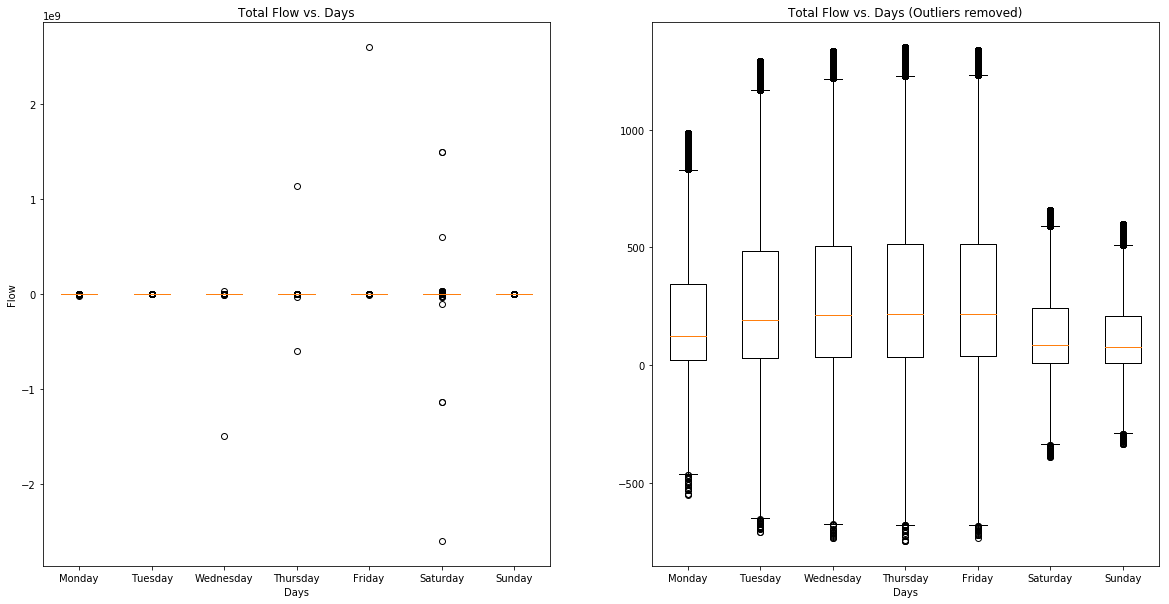

In [12]:
#Plot time series days vs. entries with and without outliers
#Outliers removed on a by day scale

#masks for days of the week
mon = df['DAY'] == 'Monday'
tue = df['DAY'] == 'Tuesday'
wed = df['DAY'] == 'Wednesday'
thur = df['DAY'] == 'Thursday'
fri = df['DAY'] == 'Friday'
sat = df['DAY'] == 'Saturday'
sun = df['DAY'] == 'Sunday'


fig, axs = plt.subplots(1,2,figsize=(20, 10))
axs[0].set_title('Total Flow vs. Days')
axs[0].set_ylabel('Flow')
axs[0].set_xlabel('Days')


axs[1].set_title('Total Flow vs. Days (Outliers removed)')
axs[1].set_xlabel('Days')
axs[0].boxplot([df['FLOW_SUM'][mon],df['FLOW_SUM'][tue],df['FLOW_SUM'][wed], df['FLOW_SUM'][thur],
             df['FLOW_SUM'][fri],df['FLOW_SUM'][sat],df['FLOW_SUM'][sun]], labels=days);
axs[1].boxplot([get_outliers(df,mon),get_outliers(df,tue),get_outliers(df,wed), get_outliers(df,thur),
                get_outliers(df,fri),get_outliers(df,sat),get_outliers(df,sun)], labels=days);
plt.subplots_adjust(wspace = .2)

In [13]:
#filter individual turnstile values using non-negatives and some arbitrarily large number.
min_flow = 0 #can't have negative flow
max_flow = 1_000_000 #filter billion+ entry records


df2 = df[(df['ENTRIES_DIFF'] > min_flow) & (df['ENTRIES_DIFF'] < max_flow) & (df['EXITS_DIFF'] > min_flow) & (df['EXITS_DIFF'] < max_flow)]

df2.head()

,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE,TURNSTILE_INDEX,ENTRIES_DIFF,EXITS_DIFF,FLOW_SUM,DAY
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14,A002-R051-02-00-00-59 ST,16.0,2.0,18.0,Saturday
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14,A002-R051-02-00-00-59 ST,13.0,29.0,42.0,Saturday
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14,A002-R051-02-00-00-59 ST,82.0,74.0,156.0,Saturday
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14,A002-R051-02-00-00-59 ST,196.0,55.0,251.0,Saturday
5,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 20:00:00,20:00:00,REGULAR,7199405,2438527,2019-09-14,A002-R051-02-00-00-59 ST,280.0,44.0,324.0,Saturday


In [14]:
def subset_by_iqr(df, column, width=1.5):
    """Remove outliers from a dataframe by column
       removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df : dataframe
        column (str): column used to calculate the subset from
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        Filtered dataframe
    """
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    return df.loc[(df[column] >= q1 - width*iqr) & (df[column] <= q3 + width*iqr)]                                                     

In [15]:
#remove outliers from dataframe
df_filtered = subset_by_iqr(df2, 'FLOW_SUM', width=1.5)
df_filtered.head()

,id,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATETIME,TIME,DESC,ENTRIES,EXITS,DATE,TURNSTILE_INDEX,ENTRIES_DIFF,EXITS_DIFF,FLOW_SUM,DAY
1,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 04:00:00,04:00:00,REGULAR,7198834,2438325,2019-09-14,A002-R051-02-00-00-59 ST,16.0,2.0,18.0,Saturday
2,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 08:00:00,08:00:00,REGULAR,7198847,2438354,2019-09-14,A002-R051-02-00-00-59 ST,13.0,29.0,42.0,Saturday
3,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 12:00:00,12:00:00,REGULAR,7198929,2438428,2019-09-14,A002-R051-02-00-00-59 ST,82.0,74.0,156.0,Saturday
4,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 16:00:00,16:00:00,REGULAR,7199125,2438483,2019-09-14,A002-R051-02-00-00-59 ST,196.0,55.0,251.0,Saturday
5,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,2019-09-14 20:00:00,20:00:00,REGULAR,7199405,2438527,2019-09-14,A002-R051-02-00-00-59 ST,280.0,44.0,324.0,Saturday


In [16]:
#groupby to get avg flow by day series
df2_agg_on_flow_by_day = df_filtered.groupby('DAY')['FLOW_SUM'].mean()
df2_agg_on_flow_by_day.head()

DAY
Friday      365.639239
Monday      294.396152
Saturday    246.433296
Sunday      215.712560
Thursday    363.826991
Name: FLOW_SUM, dtype: float64

matplotlib.axes._subplots.AxesSubplot

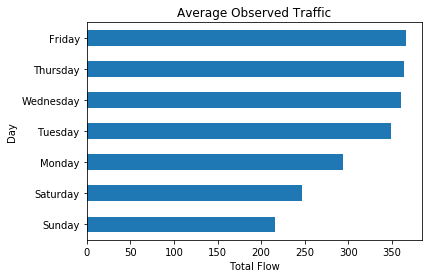

In [17]:
#plot the avg flow by day series
df2_agg_on_flow_by_day = df2_agg_on_flow_by_day.sort_values(ascending=True)
ax5 = df2_agg_on_flow_by_day.plot(kind='barh',x='FLOW_SUM',y='DAYS', title='Average Observed Traffic')
ax5.set_xlabel('Total Flow')
ax5.set_ylabel('Day')
fig5 = ax5.get_figure()
fig5.savefig("total_flow_day_barchart.png", bbox_inches='tight')
type(ax5)

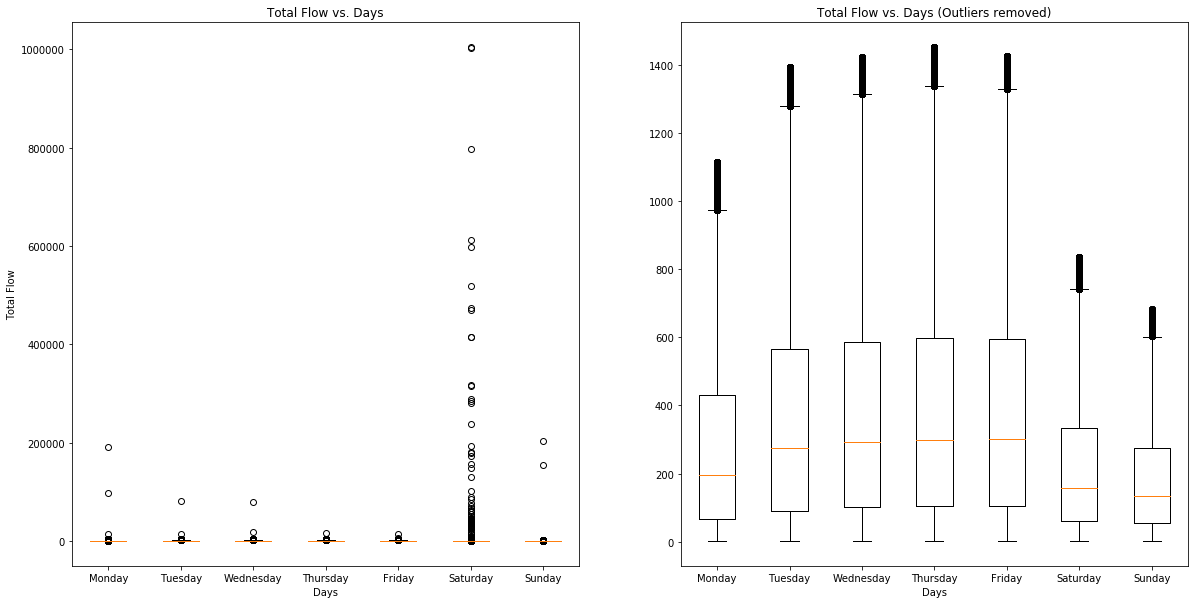

In [24]:
#plot flow vs. days after removing million+ with and without outliers in dataframe
mon2 = df2['DAY'] == 'Monday'
tue2 = df2['DAY'] == 'Tuesday'
wed2 = df2['DAY'] == 'Wednesday'
thur2 = df2['DAY'] == 'Thursday'
fri2 = df2['DAY'] == 'Friday'
sat2 = df2['DAY'] == 'Saturday'
sun2 = df2['DAY'] == 'Sunday'

fig2, axs2 = plt.subplots(1,2,figsize=(20, 10))

axs2[0].set_title('Total Flow vs. Days')
axs2[0].set_ylabel('Total Flow')
axs2[0].set_xlabel('Days')
axs2[0].boxplot([df2['FLOW_SUM'][mon2], df2['FLOW_SUM'][tue2],df2['FLOW_SUM'][wed2], df2['FLOW_SUM'][thur2],
             df2['FLOW_SUM'][fri2],df2['FLOW_SUM'][sat2],df2['FLOW_SUM'][sun2]], labels=days);

axs2[1].set_title('Total Flow vs. Days (Outliers removed)')
axs2[1].set_xlabel('Days')
axs2[1].boxplot([get_outliers(df2,mon2),get_outliers(df2,tue2),get_outliers(df2,wed2), get_outliers(df2,thur2),
                 get_outliers(df2,fri2), get_outliers(df2,sat2),get_outliers(df2,sun2)], labels=days);
plt.subplots_adjust(wspace = .2)
fig2.savefig('total_flow_vs_day.png', bbox_inches='tight')

### Summarize turnstile info up to station level

In [21]:
#Group total flow ( Entries and exits) up to station level
#display top 10 stations
flow_srs = df2.groupby('STATION')['FLOW_SUM'].sum().sort_values(ascending=False).head(10)
flow_srs = flow_srs.sort_values(ascending=True)
flow_srs.head()

STATION
125 ST             2651975.0
86 ST              2964033.0
42 ST-PORT AUTH    3058183.0
FULTON ST          3384545.0
TIMES SQ-42 ST     3442144.0
Name: FLOW_SUM, dtype: float64

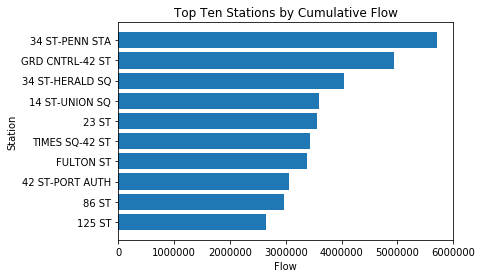

In [23]:
#horizontal barplot of total cumulative flow by station
station_names = list(flow_srs.index)
y_pos = np.arange(len(station_names))

fig3, ax3 = plt.subplots()
ax3.barh(y_pos, flow_srs, align='center')
ax3.set_yticks(y_pos)
ax3.set_yticklabels(station_names)
ax3.set_xlabel('Flow')
ax3.set_ylabel('Station')
ax3.set_title('Top Ten Stations by Cumulative Flow')

plt.show()
fig3.savefig('total_flow_per_station.png', bbox_inches='tight')

### Appendix

In [ ]:
#geospatial work using OpenNYC data

import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stations = gp.read_file('Subway_Stations.geojson') #point data of NYC subway stations
boroughs = gp.read_file('Borough_Boundaries.geojson') #polygon data of NYC boroughs
lines = gp.read_file('Subway_Lines.geojson') #line data of alphanumeric NYC subway lines

LineColorDict = {
'A' : 'BLUE','B' : 'ORANGE',
'C' : 'BLUE','D' : 'ORANGE',
'E' : 'BLUE','F' : 'ORANGE',
'G' : 'LIME','J' : 'BROWN',
'L' : 'GREY','M' : 'ORANGE',
'N' : 'YELLOW','Q' : 'YELLOW',
'R' : 'YELLOW','S' : 'GREY',
'T' : 'TURQUOISE','W' : 'YELLOW',
'Z' : 'BROWN','1' : 'RED',
'2' : 'RED','3' : 'RED',
'4' : 'GREEN','5' : 'GREEN',
'6' : 'GREEN','7' : 'GREEN',
'B-D' : 'ORANGE' ,
'B-D-F-M' : 'ORANGE',
'N-Q-R' : 'YELLOW',
'N-Q' : 'YELLOW',
'N-R' : 'YELLOW',
'F-M' : 'ORANGE',
'J-Z' : 'BROWN',
'A-C': 'BLUE',
'1-2-3': 'RED', 
'4-5-6': 'GREEN',
'N-W': 'YELLOW',
'2-3': 'RED',
'4-5': 'GREEN',
'A-C-E': 'BLUE',
'N-Q-R-W': 'YELLOW',
'N-R-W': 'YELLOW', 
'R-W': 'YELLOW'
}

lines['color'] = lines['name'].apply(lambda x: LineColorDict[x])


lines_subset = lines[lines['color'].isin(['RED','BLUE','PURPLE','YELLOW','GREY','BROWN','GREEN'])]





# Create Matplotlib figure
fig, ax = plt.subplots()
plt.suptitle('Geographic distribution of selected subway lines',fontsize = 16)
plt.figure(figsize = [15,15])
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Set Axes to equal (otherwise plot looks weird)
ax.set_aspect('equal')


boroughs.plot(ax=ax,column = 'boro_name');
lines_subset.plot(ax=ax,column = 'color')

#geodf.plot(ax=ax,marker='o', color='red', markersize=5)
#center.plot(ax=ax,color = 'blue',markersize=5)


fig.savefig('line_color_map.svg',bbox_inches = 'tight',dpi = 300)
